## Session 8 - Numerical ODE Solutions - BVPs

### Solve a second order boundary value ODE
\begin{equation}
\frac{d^2y}{dx^2} + f(x)\frac{dy}{dx} + g(x)y = p(x),\ a<x<b
\end{equation}

### Task 1: Direct Methods

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# define the functions f(x), g(x) and p(x)
def myfunc(x):
    f = 2*x
    g = 2
    p = np.cos(3*x)
    return (f, g, p)

#### Solve the system of simultaneous equations to find values of y, [A]{y} = {b}

In [3]:
# write the ODE solver
def myodebc1(xa, xb, ya, yb, N):
    x = np.linspace(xa, xb, N+1) # the range of x
    h = x[1] - x[0] # the interval (easily done in a computer)
    
    A = np.zeros((N+1, N+1)) # formulate an (N+1)x(N+1) array with zeroes (same as np.ndarray((rows, columns))
    b = np.zeros(N+1)
    
    #set boundary conditions
    A[0, 0] = 1
    b[0] = ya
    A[N, N] = 1
    b[N] = yb
    
    for i in range(1, N): # up to index N-1
        (f, g, p) = myfunc(x[i]) # receives values of f, g, p for x value at i
        A[i, i-1] = 1/h**2 - f/(2*h)
        A[i, i] = g - 2/h**2
        A[i, i+1] = 1/h**2 + f/(2*h)
        b[i] = p
    
    y = np.linalg.solve(A, b)
    return A, y, b, x

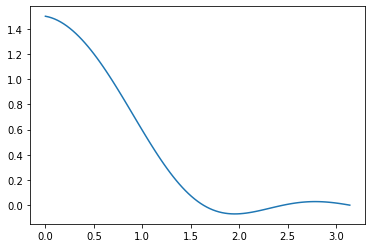

In [4]:
xa = 0
xb = np.pi
ya = 1.5
yb = 0
N = 100 # for N intervals, there are N+1 values
(A, y, b, x) = myodebc1(xa, xb, ya, yb, N)

# plot y against x
plt.plot(x, y)

### Task 2: Iterative Methods

In [5]:
def JacobiSolver(xa, xb, ya, yb, N, tol_D):
    x = np.linspace(xa, xb, N+1)
    y = np.zeros(len(x))
    h = x[1] - x[0]
    
    A = np.zeros((N+1, N+1)) # formulate an (N+1)x(N+1) array with zeroes (same as np.ndarray((rows, columns))
    b = np.zeros(N+1)
    
    A[0, 0] = 1
    b[0] = ya
    A[N, N] = 1
    b[N] = yb
    
    # formulating the matrix
    for i in range(1, N): # up to index N-1
        (f, g, p) = myfunc(x[i]) # receives values of f, g, p for x value at i
        A[i, i-1] = 1/h**2 - f/(2*h)
        A[i, i] = g - 2/h**2
        A[i, i+1] = 1/h**2 + f/(2*h)
        b[i] = p
    
    # coding the Jacobi matrix solver
    error = 10*tol_D
    while error >= tol_D:
        for k in range(1, N):
            y[k] = (b[k-1] - np.dot(A[k-1], y) + A[k-1,k-1]*y[k-1])/A[k-1, k-1]
        error = np.linalg.norm(y - np.max(y))
    return y

In [6]:
xa = 0
xb = np.pi
ya = 1.5
yb = 0
N = 10 # for N intervals, there are N+1 values
tol_D = 2
JacobiSolver(xa, xb, ya, yb, N, tol_D)

KeyboardInterrupt: 

### Task 3: Types of Different Boundary Conditions

In [39]:
def myfunc2(x, Q):
    f = x
    g = 1
    p = Q
    return (f, g, p)


In [62]:
def myodebc2(xa, xb, bca, bcb, N, c, Q):
    x = np.linspace(xa, xb, N+1)
    y = np.zeros(len(x))
    h = x[1] - x[0]
    
    A = np.zeros((N+1, N+1)) # formulate an (N+1)x(N+1) array with zeroes (same as np.ndarray((rows, columns))
    b = np.zeros(N+1)
    
    # write the boundary conditions into the matrix with linear algebra
    # boundary value a using forward difference scheme
    A[0, 0] = c[1] - c[0]/h
    A[0, 1] = c[0]/h
    b[0] = bca
    
    # boundary value b using backward difference scheme
    A[N, N] = c[2]/h + c[3]
    A[N, N-1] = -c[2]/h
    b[N] = bcb
    
    # formulating the matrix
    for i in range(1, N): # up to index N-1
        (f, g, p) = myfunc2(x[i], Q) # receives values of f, g, p for x value at i
        A[i, i-1] = 1/h**2 - f/(2*h)
        A[i, i] = g - 2/h**2
        A[i, i+1] = 1/h**2 + f/(2*h)
        b[i] = p
    y = np.linalg.solve(A, b)
    print(y)
    return (x, y)

[-1.48290933 -1.48290933 -1.48853218 -1.49974643 -1.51649399 -1.53869053
 -1.56622624 -1.59896666 -1.63675378 -1.67940727 -1.72672591 -1.77848914
 -1.83445873 -1.89438064 -1.95798684 -2.02499735 -2.09512225 -2.1680637
 -2.24351806 -2.32117795 -2.40073427 -2.48187821 -2.56430319 -2.6477067
 -2.73179208 -2.81627018 -2.90086087 -2.98529448 -3.06931305 -3.15267147
 -3.23513847 -3.31649743 -3.39654705 -3.47510193 -3.55199287 -3.62706717
 -3.70018868 -3.77123778 -3.84011118 -3.9067217  -3.97099781 -4.03288314
 -4.09233598 -4.14932851 -4.20384617 -4.25588682 -4.30545995 -4.35258582
 -4.39729458 -4.43962535 -4.47962535]
[3.51709067 3.51709067 3.51146782 3.50025357 3.48350601 3.46130947
 3.43377376 3.40103334 3.36324622 3.32059273 3.27327409 3.22151086
 3.16554127 3.10561936 3.04201316 2.97500265 2.90487775 2.8319363
 2.75648194 2.67882205 2.59926573 2.51812179 2.43569681 2.3522933
 2.26820792 2.18372982 2.09913913 2.01470552 1.93068695 1.84732853
 1.76486153 1.68350257 1.60345295 1.52489807 1.

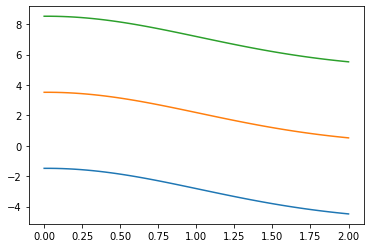

In [65]:
# Question 2:
# solve the example ODE

xa = 0
xb = 2
N = 50
bca = 0
bcb = -1
c = [1, 0, 1, 0]

(x1, y1) = myodebc2(xa, xb, bca, bcb, N, c, -5)
plt.plot(x1, y1)

(x2, y2) = myodebc2(xa, xb, bca, bcb, N, c, 0)
plt.plot(x2 ,y2)

(x3, y3) = myodebc2(xa, xb, bca, bcb, N, c, 5)
plt.plot(x3, y3)


### Task 3: Heat transfer in a nuclear fuel rod

In [79]:
def funct(x, R, k):
    f = 1/x
    g = 0
    p = ((-10**8)*np.exp(-x/R))/(R*k)
    return (f, g, p)

In [83]:
def myodebc3(xa, xb, bca, bcb, N, c):
    x = np.linspace(xa, xb, N+1)
    y = np.zeros(len(x))
    h = x[1] - x[0]
    
    A = np.zeros((N+1, N+1)) # formulate an (N+1)x(N+1) array with zeroes (same as np.ndarray((rows, columns))
    b = np.zeros(N+1)
    
    # write the boundary conditions into the matrix with linear algebra
    # boundary value a using forward difference scheme
    A[0, 0] = c[1] - c[0]/h
    A[0, 1] = c[0]/h
    b[0] = bca
    
    # boundary value b using backward difference scheme
    A[N, N] = c[2]/h + c[3]
    A[N, N-1] = -c[2]/h
    b[N] = bcb
    
    # formulating the matrix
    for i in range(1, N): # up to index N-1
        (f, g, p) = funct(x[i], R, k) # receives values of f, g, p for x value at i
        A[i, i-1] = 1/h**2 - f/(2*h)
        A[i, i] = g - 2/h**2
        A[i, i+1] = 1/h**2 + f/(2*h)
        b[i] = p
    y = np.linalg.solve(A, b)
    print(y)
    return (x, y)

[1253.56589261 1251.30201201 1248.52317007 1245.23345813 1241.43692732
 1237.13758907 1232.33941574 1227.04634109 1221.26226087 1214.99103334
 1208.23647975 1201.00238487 1193.29249751 1185.11053096 1176.46016351
 1167.34503889 1157.76876677 1147.73492316 1137.24705091 1126.3086601
 1114.92322852 1103.09420204 1090.82499506 1078.11899092 1064.97954225
 1051.40997144 1037.41357096 1022.99360379 1008.15330375  992.89587589
  977.22449685  961.14231523  944.65245189  927.75800034  910.46202706
  892.76757184  874.67764808  856.19524314  837.32331863  818.06481076
  798.42263059  778.39966438  757.99877384  737.22279647  716.0745458
  694.5568117   672.67236064  650.42393597  627.81425821  604.84602524
  581.52191267]


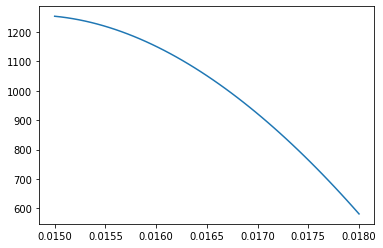

In [88]:
#x is r, y is T

R = 15*10**-3
w = 3*10**-3
k = 16.75
h = 6*10**4
N = 50
Tw = 473

bca = (-6.32*10**5)/k
bcb = (*h/k)*Tw
c = [1, 0, 1, h/k]

(r1, T1) = myodebc3(R, R+w, bca, bcb, N, c)
plt.plot(r1, T1)